In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# for PCA transformation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# Remove nrows when ready for full dataset

# Remove 2K from name in last block for complete file

In [3]:
# WARNING, FILE "mergefiles.csv" IS 1.37 GB

delay_data = pd.read_csv("../Resources/mergefiles.csv", encoding = 'utf-8')
delay = pd.DataFrame(delay_data)

# 1. Data Exploration

In [4]:
print(delay.DEPARTING_AIRPORT.unique())

['McCarran International' 'Orlando International' 'Boise Air Terminal'
 'Raleigh-Durham International' 'Kansas City International'
 'Seattle International' "Chicago O'Hare International"
 'Miami International' 'General Mitchell Field' 'Tampa International'
 'San Antonio International' 'Fort Lauderdale-Hollywood International'
 'Los Angeles International' 'Atlanta Municipal' 'Tulsa International'
 'San Francisco International' 'Portland International'
 'Honolulu International' 'Reno/Tahoe International'
 'Southwest Florida International' 'Salt Lake City International'
 'Orange County' 'Sacramento International' 'Logan International'
 'Nashville International' 'Palm Springs International'
 'Phoenix Sky Harbor International' 'San Diego International Lindbergh Fl'
 'Austin - Bergstrom International' 'Minneapolis-St Paul International'
 'Savannah/Hilton Head International' 'Detroit Metro Wayne County'
 'Philadelphia International' 'John F. Kennedy International'
 'Tucson International' 'LaG

In [5]:
# Data type
delay.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX            

In [6]:
delay1 = delay.drop(delay[(delay['DEPARTING_AIRPORT'] != 'Houston Intercontinental') &
                         (delay['DEPARTING_AIRPORT'] != "Chicago O'Hare International") &
                         (delay['DEPARTING_AIRPORT'] != "Los Angeles International")
                        ].index)
delay1.sample(10)

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
3327428,7,4,0,0600-0659,3,2,26,50,SkyWest Airlines Inc.,29376,...,17,Chicago O'Hare International,41.978,-87.906,Fort Wayne Municipal,0.00,0.0,0.0,91.0,8.28
89153,1,2,0,1200-1259,4,4,51,179,United Air Lines Inc.,14501,...,1,Houston Intercontinental,29.983,-95.340,Austin - Bergstrom International,0.00,0.0,0.0,83.0,5.82
5744058,11,4,0,1800-1859,1,3,81,129,SkyWest Airlines Inc.,26830,...,11,Chicago O'Hare International,41.978,-87.906,Boise Air Terminal,0.01,0.2,2.0,30.0,7.16
1014869,3,7,0,1800-1859,6,1,59,120,United Air Lines Inc.,15597,...,21,Houston Intercontinental,29.983,-95.340,NONE,0.00,0.0,0.0,85.0,13.20
2950156,6,5,0,1900-1959,3,5,35,180,Delta Air Lines Inc.,18543,...,2,Los Angeles International,33.942,-118.408,Salt Lake City International,0.00,0.0,0.0,73.0,7.83
5705343,11,3,0,1500-1559,3,3,71,160,American Airlines Inc.,26830,...,3,Chicago O'Hare International,41.978,-87.906,LaGuardia,0.01,0.0,0.0,55.0,11.41
5089864,10,1,0,1700-1759,5,4,42,154,United Air Lines Inc.,29960,...,13,Chicago O'Hare International,41.978,-87.906,Albuquerque International Sunport,0.05,0.0,0.0,67.0,15.66
4315849,9,5,0,1800-1859,2,3,91,173,United Air Lines Inc.,28583,...,5,Chicago O'Hare International,41.978,-87.906,Portland International,1.35,0.0,0.0,77.0,11.86
6187790,12,5,0,0700-0759,5,1,45,70,Atlantic Southeast Airlines,15165,...,0,Houston Intercontinental,29.983,-95.340,NONE,0.00,0.0,0.0,83.0,6.49
3402331,7,3,0,1300-1359,3,4,51,160,American Airlines Inc.,29376,...,4,Chicago O'Hare International,41.978,-87.906,Pittsburgh International,0.01,0.0,0.0,94.0,10.51


## Reset and remove Index

In [7]:
delay1.reset_index(inplace = True)
delay1.head(5)

,index,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1541,1,3,0,1200-1259,3,1,52,76,SkyWest Airlines Inc.,...,4,Chicago O'Hare International,41.978,-87.906,NONE,0.22,1.0,3.9,34.0,9.84
1,1542,1,3,1,1000-1059,3,1,55,50,SkyWest Airlines Inc.,...,16,Chicago O'Hare International,41.978,-87.906,NONE,0.22,1.0,3.9,34.0,9.84
2,1543,1,3,1,0700-0759,2,1,49,50,SkyWest Airlines Inc.,...,15,Chicago O'Hare International,41.978,-87.906,NONE,0.22,1.0,3.9,34.0,9.84
3,1544,1,3,1,0800-0859,2,1,48,50,SkyWest Airlines Inc.,...,5,Chicago O'Hare International,41.978,-87.906,NONE,0.22,1.0,3.9,34.0,9.84
4,1545,1,3,1,1000-1059,6,1,55,76,SkyWest Airlines Inc.,...,2,Chicago O'Hare International,41.978,-87.906,NONE,0.22,1.0,3.9,34.0,9.84


In [8]:
delay1.drop(['index'], axis = 1, inplace = True)
delay1.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,3,0,1200-1259,3,1,52,76,SkyWest Airlines Inc.,23400,...,4,Chicago O'Hare International,41.978,-87.906,NONE,0.22,1.0,3.9,34.0,9.84
1,1,3,1,1000-1059,3,1,55,50,SkyWest Airlines Inc.,23400,...,16,Chicago O'Hare International,41.978,-87.906,NONE,0.22,1.0,3.9,34.0,9.84
2,1,3,1,0700-0759,2,1,49,50,SkyWest Airlines Inc.,23400,...,15,Chicago O'Hare International,41.978,-87.906,NONE,0.22,1.0,3.9,34.0,9.84
3,1,3,1,0800-0859,2,1,48,50,SkyWest Airlines Inc.,23400,...,5,Chicago O'Hare International,41.978,-87.906,NONE,0.22,1.0,3.9,34.0,9.84
4,1,3,1,1000-1059,6,1,55,76,SkyWest Airlines Inc.,23400,...,2,Chicago O'Hare International,41.978,-87.906,NONE,0.22,1.0,3.9,34.0,9.84


In [9]:
delay1.drop_duplicates()
delay1.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,3,0,1200-1259,3,1,52,76,SkyWest Airlines Inc.,23400,...,4,Chicago O'Hare International,41.978,-87.906,NONE,0.22,1.0,3.9,34.0,9.84
1,1,3,1,1000-1059,3,1,55,50,SkyWest Airlines Inc.,23400,...,16,Chicago O'Hare International,41.978,-87.906,NONE,0.22,1.0,3.9,34.0,9.84
2,1,3,1,0700-0759,2,1,49,50,SkyWest Airlines Inc.,23400,...,15,Chicago O'Hare International,41.978,-87.906,NONE,0.22,1.0,3.9,34.0,9.84
3,1,3,1,0800-0859,2,1,48,50,SkyWest Airlines Inc.,23400,...,5,Chicago O'Hare International,41.978,-87.906,NONE,0.22,1.0,3.9,34.0,9.84
4,1,3,1,1000-1059,6,1,55,76,SkyWest Airlines Inc.,23400,...,2,Chicago O'Hare International,41.978,-87.906,NONE,0.22,1.0,3.9,34.0,9.84


In [10]:
# Missing data
delay1.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

In [11]:
# Number of unique values, and range
for col in delay1.columns:
    print(f'"{col}" has {delay1[col].nunique()} unique values, from {delay1[col].min()} to {delay1[col].max()}')

"MONTH" has 12 unique values, from 1 to 12
"DAY_OF_WEEK" has 7 unique values, from 1 to 7
"DEP_DEL15" has 2 unique values, from 0 to 1
"DEP_TIME_BLK" has 19 unique values, from 0001-0559 to 2300-2359
"DISTANCE_GROUP" has 11 unique values, from 1 to 11
"SEGMENT_NUMBER" has 11 unique values, from 1 to 11
"CONCURRENT_FLIGHTS" has 92 unique values, from 1 to 92
"NUMBER_OF_SEATS" has 79 unique values, from 44 to 337
"CARRIER_NAME" has 17 unique values, from Alaska Airlines Inc. to United Air Lines Inc.
"AIRPORT_FLIGHTS_MONTH" has 36 unique values, from 13272 to 29971
"AIRLINE_FLIGHTS_MONTH" has 198 unique values, from 5582 to 117728
"AIRLINE_AIRPORT_FLIGHTS_MONTH" has 377 unique values, from 9 to 7167
"AVG_MONTHLY_PASS_AIRPORT" has 3 unique values, from 1690031 to 3103410
"AVG_MONTHLY_PASS_AIRLINE" has 17 unique values, from 473794 to 13382999
"FLT_ATTENDANTS_PER_PASS" has 14 unique values, from 0.0 to 0.000348407665605
"GROUND_SERV_PER_PASS" has 17 unique values, from 7.134694872433899e-06

In [12]:
# Number of flights not delayed (0), and delayed (1)
delay1['DEP_DEL15'].value_counts()

0    574170
1    149103
Name: DEP_DEL15, dtype: int64

In [13]:
# Number of airports
delay1['DEPARTING_AIRPORT'].nunique()

3

In [14]:
# Number of flights per airport
delay1.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count()

DEPARTING_AIRPORT
Chicago O'Hare International    329045
Houston Intercontinental        177108
Los Angeles International       217120
Name: DEP_DEL15, dtype: int64

In [15]:
# Replace " " with "_"
delay1['PREVIOUS_AIRPORT'] = delay1['PREVIOUS_AIRPORT'].str.replace(" ", "_")
delay1['PREVIOUS_AIRPORT'] = delay1['PREVIOUS_AIRPORT'].str.replace("/", "_")
delay1['DEP_TIME_BLK'] = delay1['DEP_TIME_BLK'].str.replace("-", "_")
delay1['DEPARTING_AIRPORT'] = delay1['DEPARTING_AIRPORT'].str.replace(" ", "_")
delay1['DEPARTING_AIRPORT'] = delay1['DEPARTING_AIRPORT'].str.replace("/", "_")
delay1['DEPARTING_AIRPORT'] = delay1['DEPARTING_AIRPORT'].str.replace(".", "")
delay1['DEPARTING_AIRPORT'] = delay1['DEPARTING_AIRPORT'].str.replace("'Hare", "Hare")
delay1['DEPARTING_AIRPORT'] = delay1['DEPARTING_AIRPORT'].str.replace("-", "_")
delay1['CARRIER_NAME'] = delay1['CARRIER_NAME'].str.replace(" ", "_")
delay1['CARRIER_NAME'] = delay1['CARRIER_NAME'].str.replace("/", "_")
delay1['CARRIER_NAME'] = delay1['CARRIER_NAME'].str.replace(".", "")
delay1.sample(5)

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys
/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if sys.path[0] == '':


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
16403,1,2,0,1100_1159,3,2,23,76,"Midwest_Airline,_Inc",14501,...,2,Houston_Intercontinental,29.983,-95.340,Atlanta_Municipal,0.00,0.0,0.0,83.0,6.71
142487,3,3,0,1800_1859,2,4,87,142,United_Air_Lines_Inc,27137,...,20,Chicago_OHare_International,41.978,-87.906,Logan_International,0.14,0.0,0.0,44.0,8.50
179829,4,3,0,0900_0959,7,2,44,228,Spirit_Air_Lines,17522,...,3,Los_Angeles_International,33.942,-118.408,Dallas_Fort_Worth_Regional,0.00,0.0,0.0,67.0,7.83
20825,1,7,0,0700_0759,3,1,33,129,Atlantic_Southeast_Airlines,14501,...,11,Houston_Intercontinental,29.983,-95.340,NONE,0.00,0.0,0.0,84.0,4.70
300439,6,2,0,2100_2159,7,5,41,182,Spirit_Air_Lines,28904,...,3,Chicago_OHare_International,41.978,-87.906,Louis_Armstrong_New_Orleans_International,0.29,0.0,0.0,82.0,10.51


In [16]:
# Grouped by airport: count of delay/on-time
print(delay1.groupby(['DEPARTING_AIRPORT','DEP_DEL15'])['MONTH'].agg('count'))

DEPARTING_AIRPORT            DEP_DEL15
Chicago_OHare_International  0            254996
                             1             74049
Houston_Intercontinental     0            143115
                             1             33993
Los_Angeles_International    0            176059
                             1             41061
Name: MONTH, dtype: int64


### Distance group
1 to 11
Distance group to be flown by departing aircraft.

<AxesSubplot:>

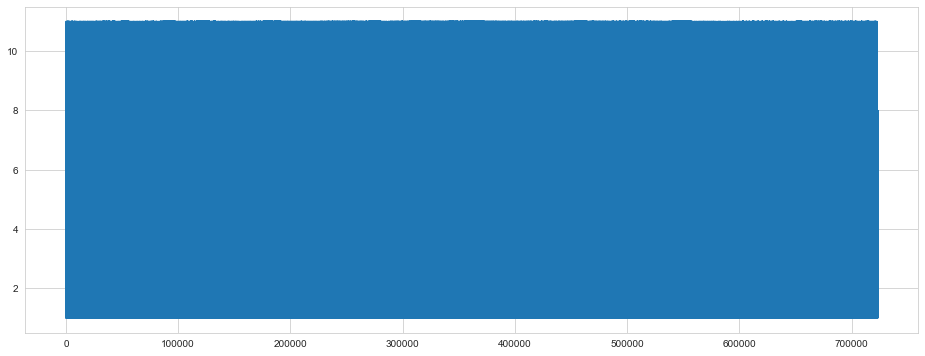

In [17]:
sns.set_style('whitegrid')
delay1["DISTANCE_GROUP"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

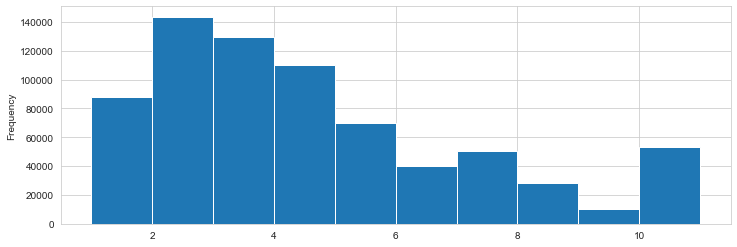

In [18]:
delay1['DISTANCE_GROUP'].plot(kind='hist', figsize = (12, 4))

### Segment number
1 to 15
The segment that this tail number is on for the day.

<AxesSubplot:>

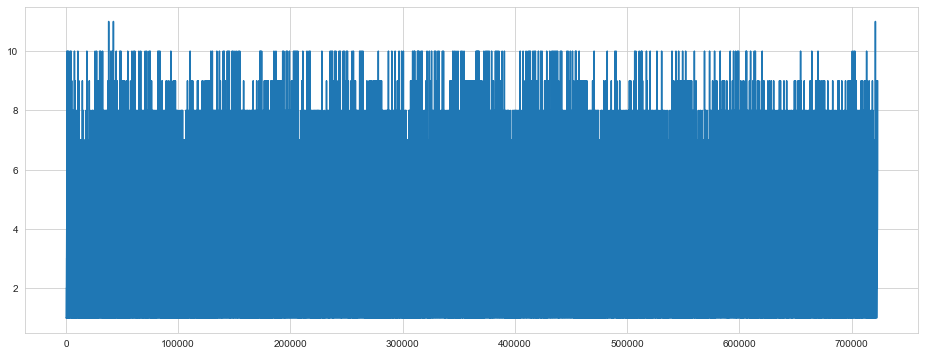

In [19]:
delay1["SEGMENT_NUMBER"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

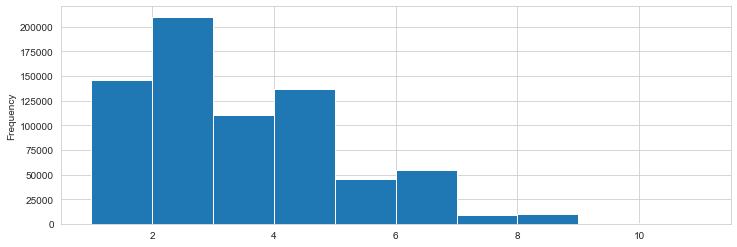

In [20]:
delay1['SEGMENT_NUMBER'].plot(kind = 'hist', figsize = (12, 4))

### Concurrent flights

<AxesSubplot:>

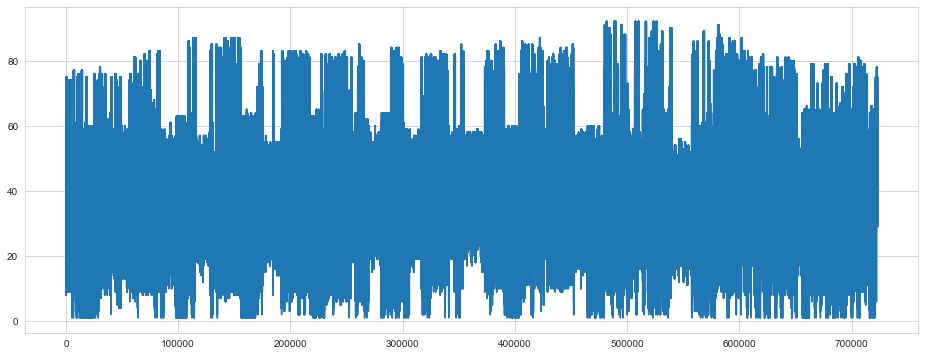

In [21]:
delay1["CONCURRENT_FLIGHTS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

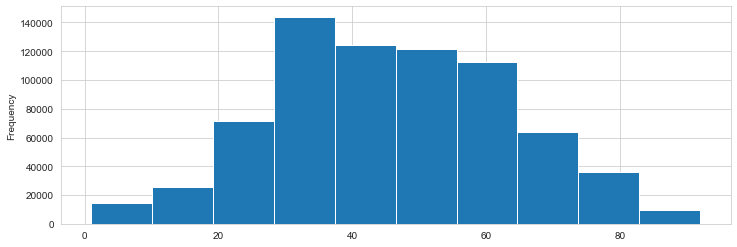

In [22]:
delay1['CONCURRENT_FLIGHTS'].plot(kind = 'hist', figsize = (12, 4))

### Number of seats

<AxesSubplot:>

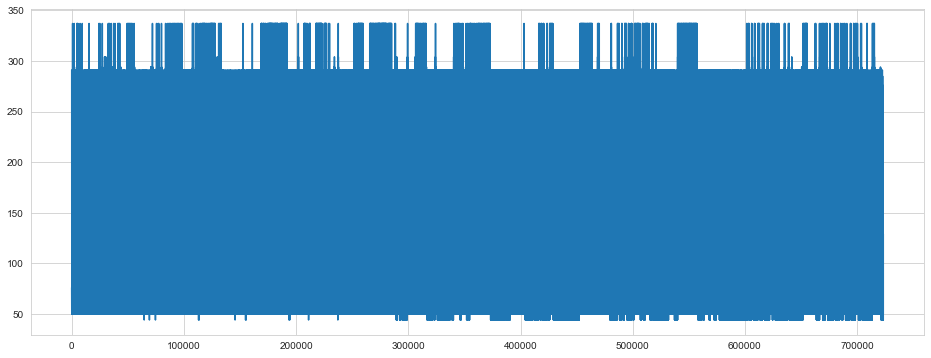

In [23]:
delay1["NUMBER_OF_SEATS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

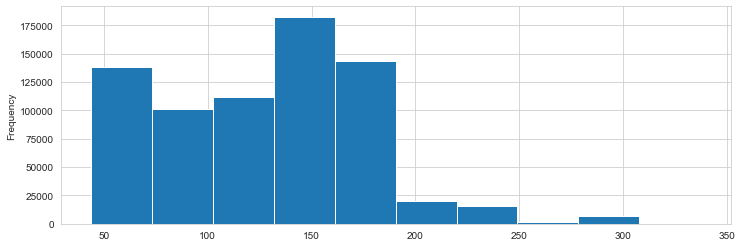

In [24]:
delay1['NUMBER_OF_SEATS'].plot(kind = 'hist', figsize = (12, 4))

### Airport flights per month

<AxesSubplot:>

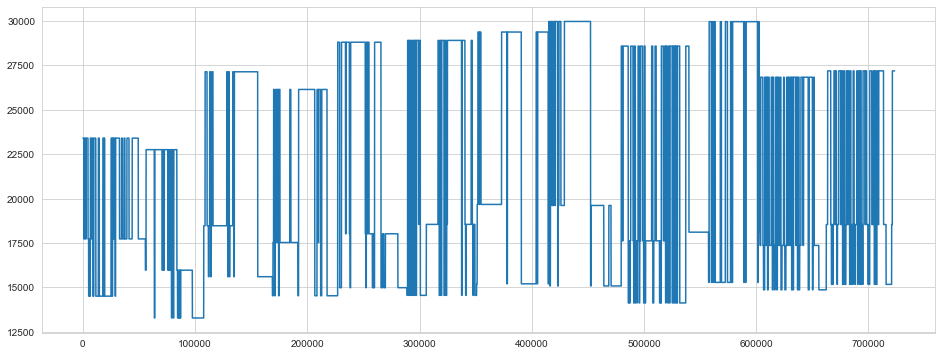

In [25]:
delay1["AIRPORT_FLIGHTS_MONTH"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

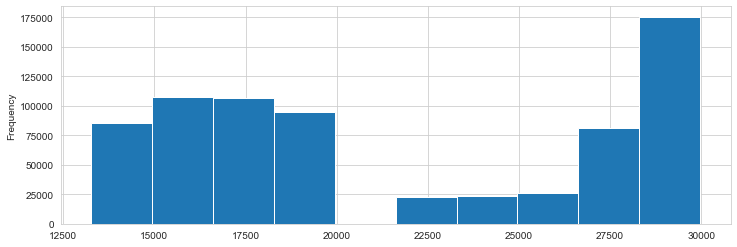

In [26]:
delay1['AIRPORT_FLIGHTS_MONTH'].plot(kind = 'hist', figsize = (12, 4))

### Airline flights per month

<AxesSubplot:>

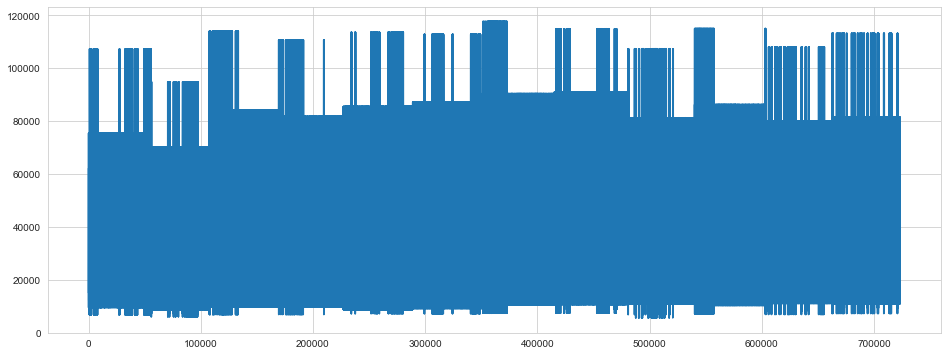

In [27]:
delay1["AIRLINE_FLIGHTS_MONTH"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

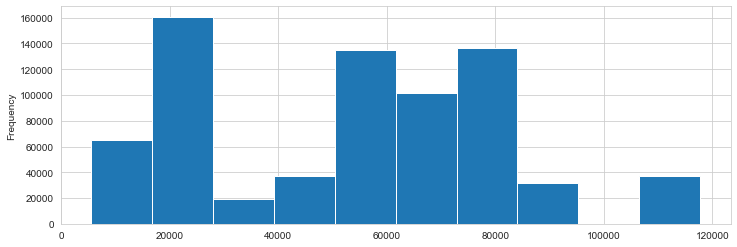

In [28]:
delay1['AIRLINE_FLIGHTS_MONTH'].plot(kind = 'hist', figsize = (12, 4))

### AIRLINE_AIRPORT_FLIGHTS_MONTH

<AxesSubplot:>

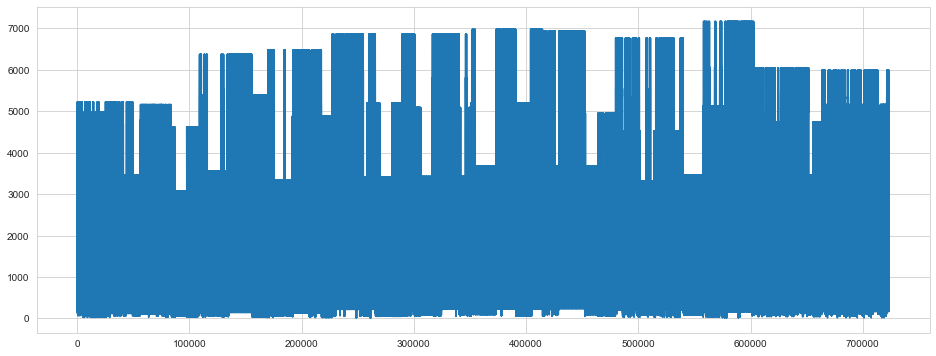

In [29]:
delay1["AIRLINE_AIRPORT_FLIGHTS_MONTH"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

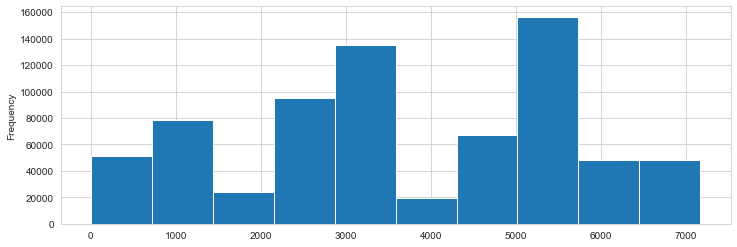

In [30]:
delay1['AIRLINE_AIRPORT_FLIGHTS_MONTH'].plot(kind = 'hist', figsize = (12, 4))

### AVG_MONTHLY_PASS_AIRPORT

<AxesSubplot:>

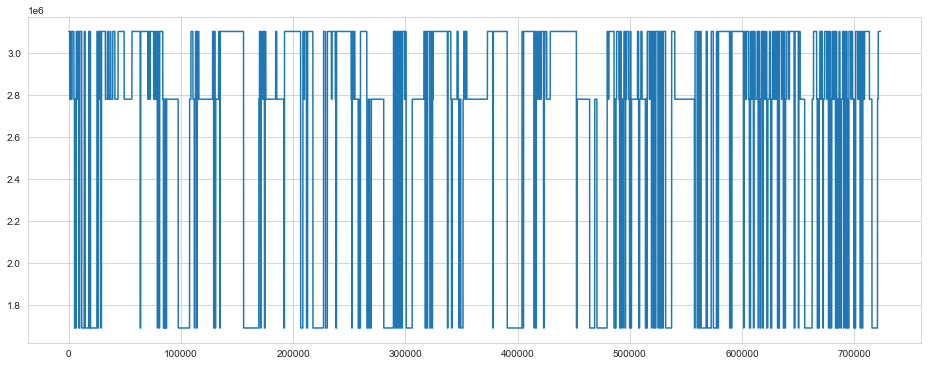

In [31]:
delay1["AVG_MONTHLY_PASS_AIRPORT"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

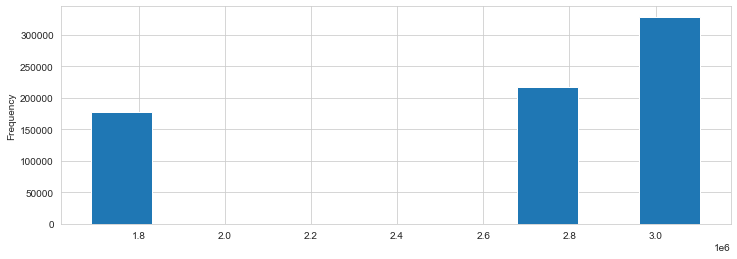

In [32]:
delay1['AVG_MONTHLY_PASS_AIRPORT'].plot(kind = 'hist', figsize = (12, 4))

### AVG_MONTHLY_PASS_AIRLINE

<AxesSubplot:>

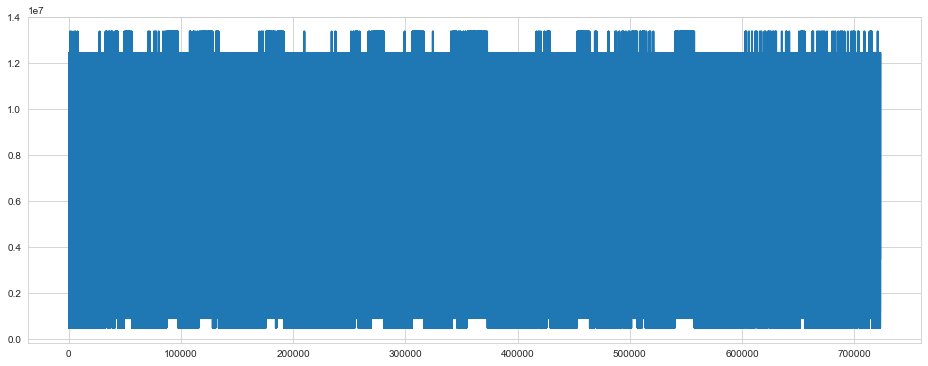

In [33]:
delay1["AVG_MONTHLY_PASS_AIRLINE"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

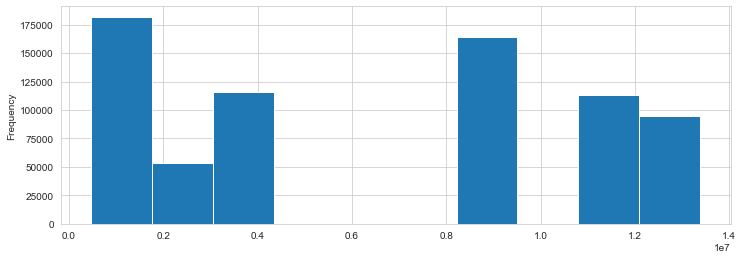

In [34]:
delay1['AVG_MONTHLY_PASS_AIRLINE'].plot(kind = 'hist', figsize = (12, 4))

### FLT_ATTENDANTS_PER_PASS

<AxesSubplot:>

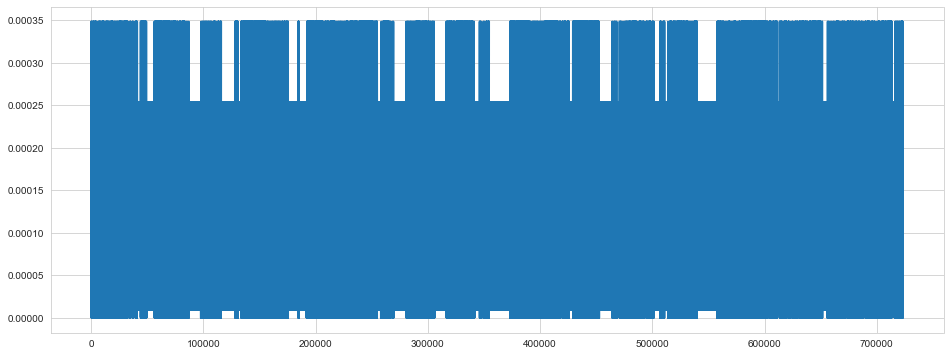

In [35]:
delay1["FLT_ATTENDANTS_PER_PASS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

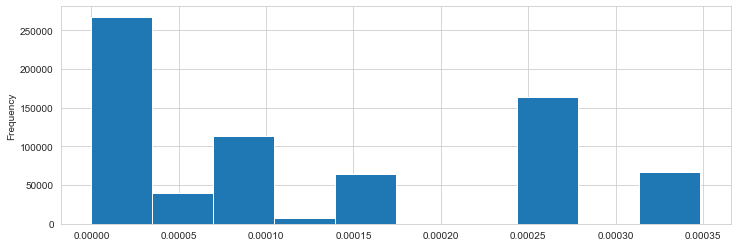

In [36]:
delay1['FLT_ATTENDANTS_PER_PASS'].plot(kind = 'hist', figsize = (12, 4))

### GROUND_SERV_PER_PASS

<AxesSubplot:>

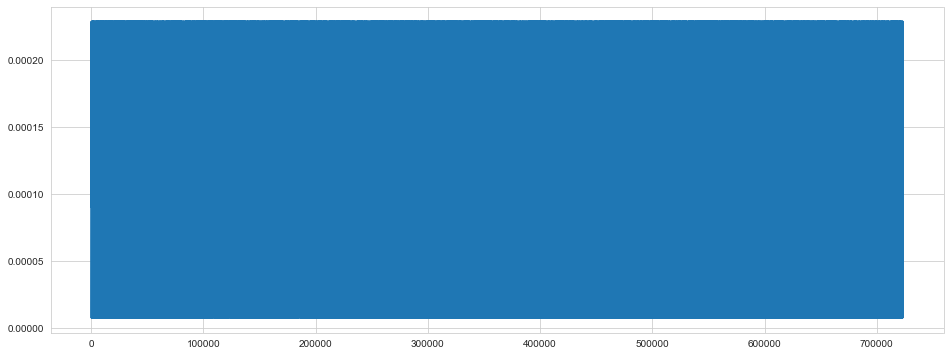

In [37]:
delay1["GROUND_SERV_PER_PASS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

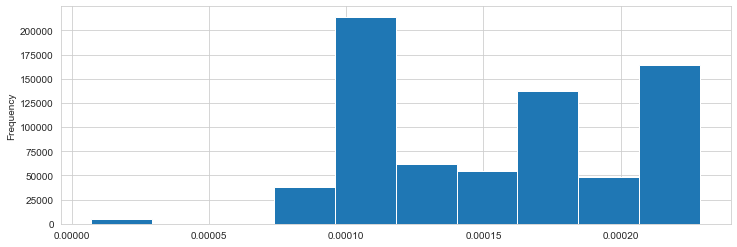

In [38]:
delay1['GROUND_SERV_PER_PASS'].plot(kind = 'hist', figsize = (12, 4))

### Plane age

<AxesSubplot:>

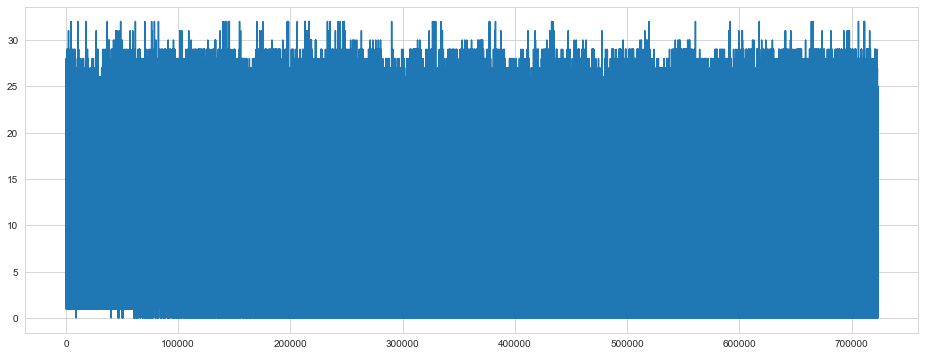

In [39]:
delay1["PLANE_AGE"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

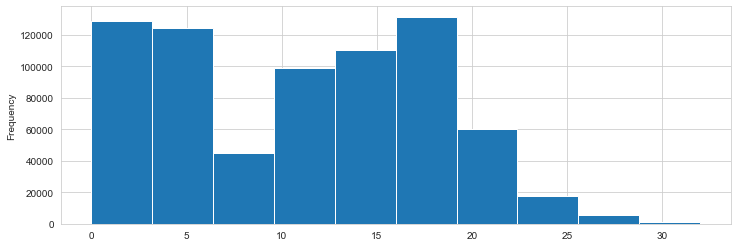

In [40]:
delay1['PLANE_AGE'].plot(kind = 'hist', figsize = (12, 4))

### Departing airport

<AxesSubplot:xlabel='DEPARTING_AIRPORT'>

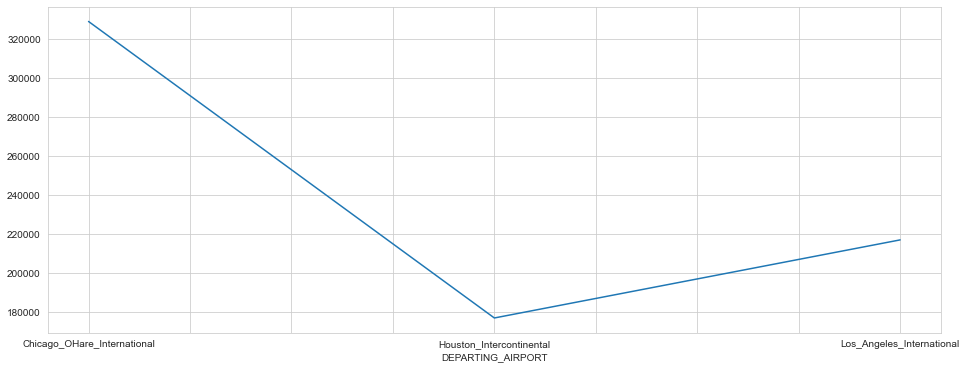

In [41]:
delay1.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count().plot(figsize = (16, 6))

### Previous airport

<AxesSubplot:xlabel='PREVIOUS_AIRPORT'>

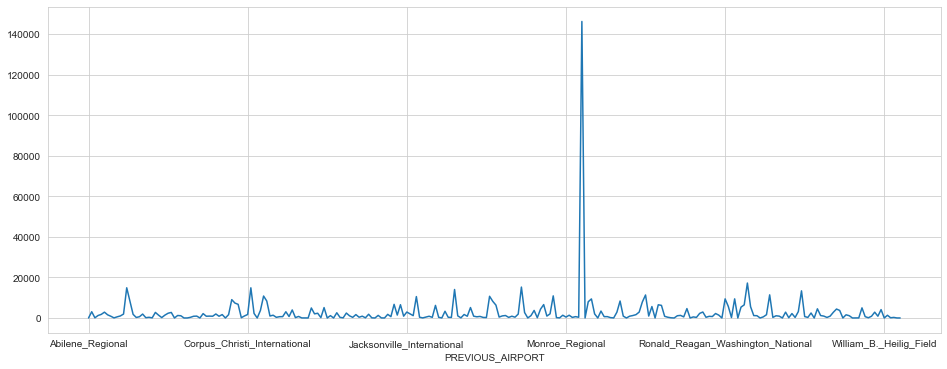

In [42]:
delay1.groupby('PREVIOUS_AIRPORT')['DEP_DEL15'].count().plot(figsize = (16, 6))

### Precipitation

<AxesSubplot:>

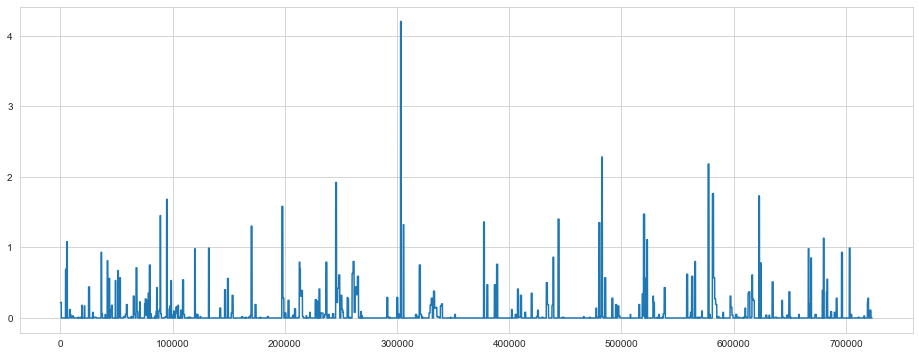

In [43]:
delay1["PRCP"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

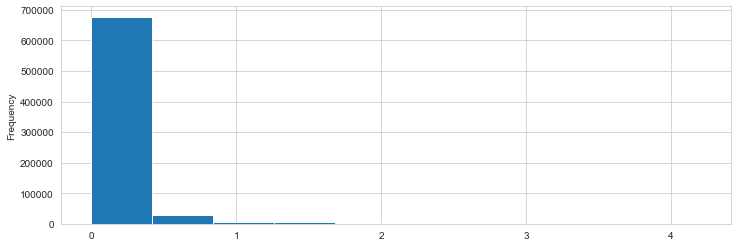

In [44]:
delay1['PRCP'].plot(kind = 'hist', figsize = (12, 4))

### Snow (SNOW)
0 to 17.2
Inches of snowfall for day.

<AxesSubplot:>

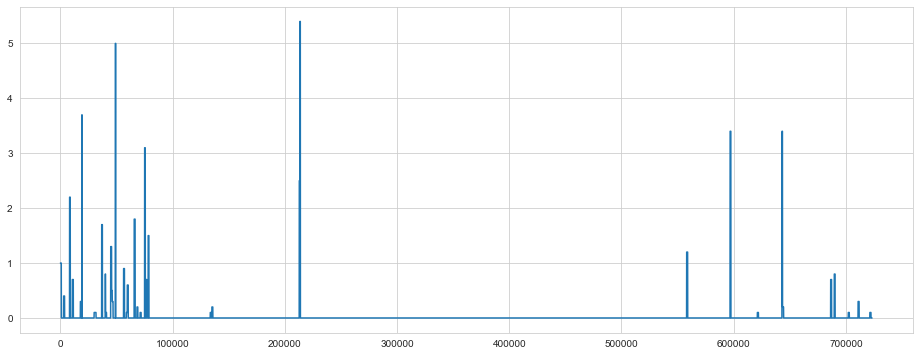

In [45]:
delay1["SNOW"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

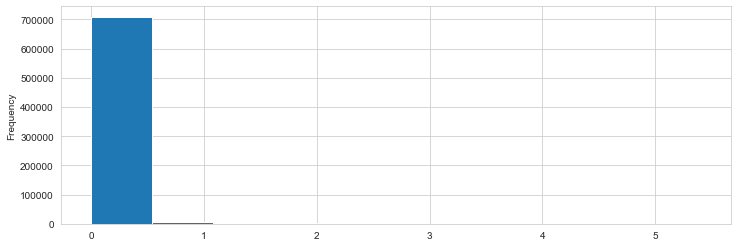

In [46]:
delay1['SNOW'].plot(kind = 'hist', figsize = (12, 4))

### SNOWD
0 to 25.2
Inches of snow on ground for day.

<AxesSubplot:>

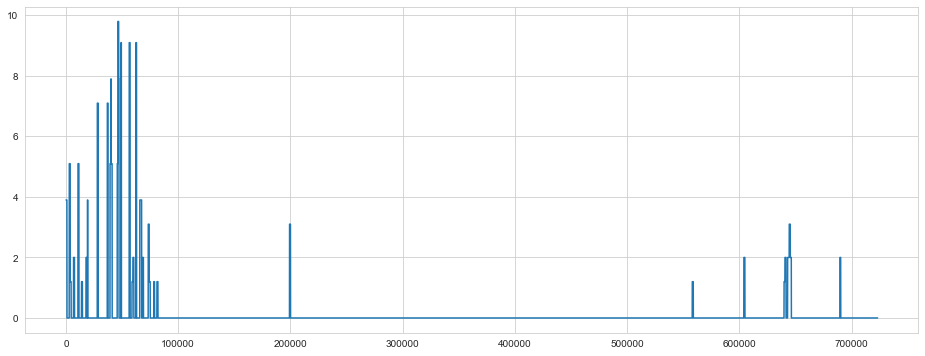

In [47]:
delay1["SNWD"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

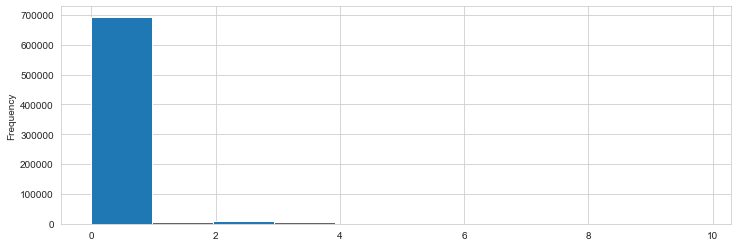

In [48]:
delay1['SNWD'].plot(kind='hist', figsize = (12, 4))

### Temperature

<AxesSubplot:>

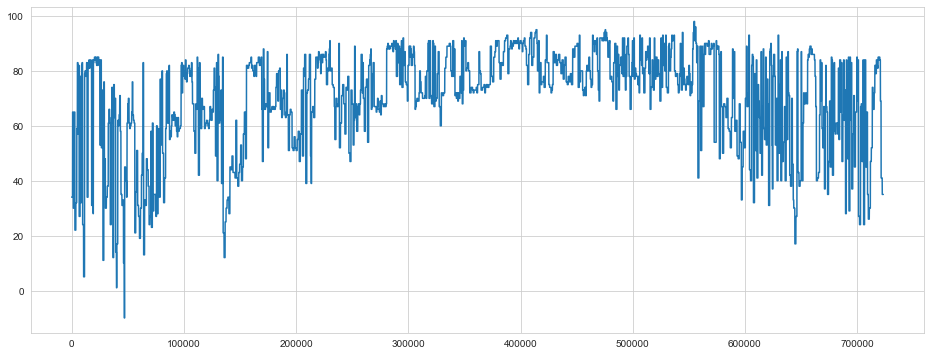

In [49]:
delay1["TMAX"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

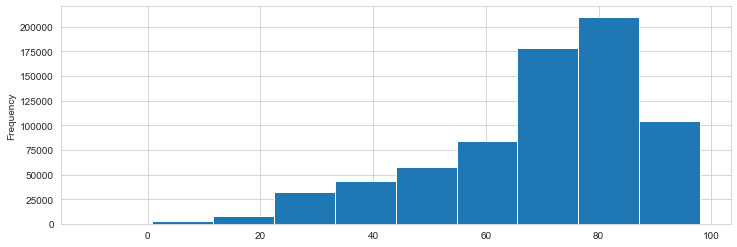

In [50]:
delay1['TMAX'].plot(kind = 'hist', figsize = (12, 4))

### Air wind speed (AWND)
0 to 33.78
Max wind speed for day.

<AxesSubplot:>

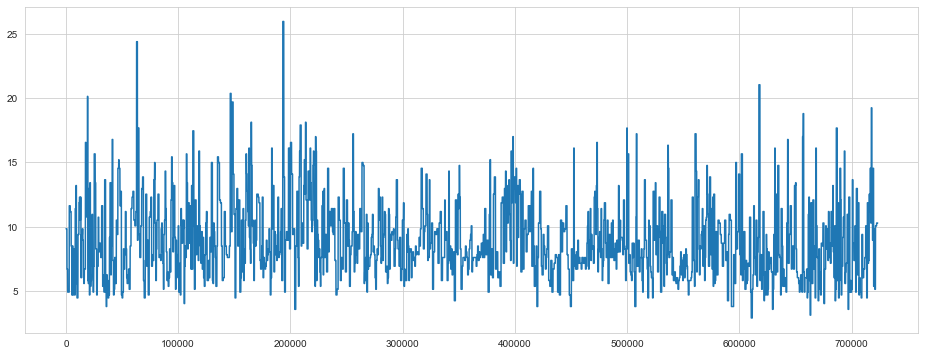

In [51]:
delay1["AWND"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

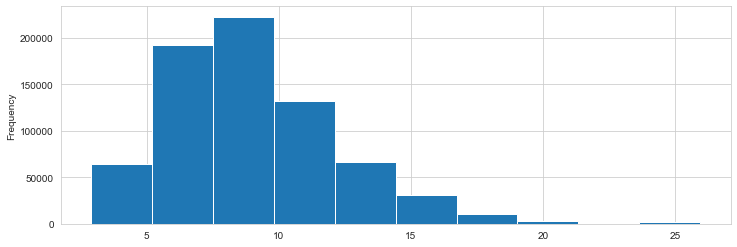

In [52]:
delay1['AWND'].plot(kind = 'hist', figsize = (12, 4))

# 2. Data Cleanup

### DEP_TIME_BLK categorical variable

In [53]:
# Visualize the value counts
DEP_TIME_BLK_counts = delay1.DEP_TIME_BLK.value_counts()
DEP_TIME_BLK_counts

1800_1859    57187
1400_1459    52884
1200_1259    51491
0800_0859    51430
0700_0759    51039
1000_1059    49898
0900_0959    49885
1900_1959    46083
1600_1659    41782
1100_1159    38093
1500_1559    36643
2100_2159    35234
2000_2059    33794
1300_1359    31414
1700_1759    30542
0600_0659    27493
2200_2259    18928
0001_0559    11366
2300_2359     8087
Name: DEP_TIME_BLK, dtype: int64

<AxesSubplot:ylabel='Density'>

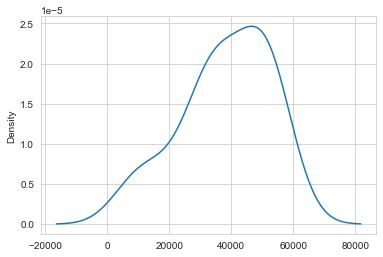

In [54]:
DEP_TIME_BLK_counts.plot.density()

In [55]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse = False)

In [56]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(delay1.DEP_TIME_BLK.values.reshape(-1,1)))

In [57]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['DEP_TIME_BLK'])
encode_df.head()

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,DEP_TIME_BLK_0001_0559,DEP_TIME_BLK_0600_0659,DEP_TIME_BLK_0700_0759,DEP_TIME_BLK_0800_0859,DEP_TIME_BLK_0900_0959,DEP_TIME_BLK_1000_1059,DEP_TIME_BLK_1100_1159,DEP_TIME_BLK_1200_1259,DEP_TIME_BLK_1300_1359,DEP_TIME_BLK_1400_1459,DEP_TIME_BLK_1500_1559,DEP_TIME_BLK_1600_1659,DEP_TIME_BLK_1700_1759,DEP_TIME_BLK_1800_1859,DEP_TIME_BLK_1900_1959,DEP_TIME_BLK_2000_2059,DEP_TIME_BLK_2100_2159,DEP_TIME_BLK_2200_2259,DEP_TIME_BLK_2300_2359
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Merge the two DataFrames together and drop the encoded column
delay_block = delay1.merge(encode_df,left_index = True, right_index = True).drop(["DEP_TIME_BLK"], axis = 1)

In [59]:
delay_block.sample(5)

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,...,DEP_TIME_BLK_1400_1459,DEP_TIME_BLK_1500_1559,DEP_TIME_BLK_1600_1659,DEP_TIME_BLK_1700_1759,DEP_TIME_BLK_1800_1859,DEP_TIME_BLK_1900_1959,DEP_TIME_BLK_2000_2059,DEP_TIME_BLK_2100_2159,DEP_TIME_BLK_2200_2259,DEP_TIME_BLK_2300_2359
484352,9,2,0,2,2,79,50,American_Eagle_Airlines_Inc,28583,26473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117208,3,3,1,10,1,52,267,United_Air_Lines_Inc,18465,53007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578281,10,2,1,2,4,61,129,Atlantic_Southeast_Airlines,15277,10329,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176380,4,3,0,4,2,33,154,United_Air_Lines_Inc,17522,51763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
355339,7,7,1,6,1,44,276,United_Air_Lines_Inc,19667,55374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# Fit the encoder and produce encoded DataFrame (CARRIER_NAME)
encode_df = pd.DataFrame(enc.fit_transform(delay_block.CARRIER_NAME.values.reshape(-1,1)))

In [61]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['CARRIER_NAME'])
encode_df.head()

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CARRIER_NAME_Alaska_Airlines_Inc,CARRIER_NAME_Allegiant_Air,CARRIER_NAME_American_Airlines_Inc,CARRIER_NAME_American_Eagle_Airlines_Inc,CARRIER_NAME_Atlantic_Southeast_Airlines,CARRIER_NAME_Comair_Inc,CARRIER_NAME_Delta_Air_Lines_Inc,CARRIER_NAME_Endeavor_Air_Inc,CARRIER_NAME_Frontier_Airlines_Inc,CARRIER_NAME_Hawaiian_Airlines_Inc,CARRIER_NAME_JetBlue_Airways,CARRIER_NAME_Mesa_Airlines_Inc,"CARRIER_NAME_Midwest_Airline,_Inc",CARRIER_NAME_SkyWest_Airlines_Inc,CARRIER_NAME_Southwest_Airlines_Co,CARRIER_NAME_Spirit_Air_Lines,CARRIER_NAME_United_Air_Lines_Inc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
# Merge the two DataFrames together and drop the encoded column
delay_carrier = delay_block.merge(encode_df,left_index = True, right_index = True).drop(["CARRIER_NAME"], axis = 1)

In [63]:
delay_carrier.sample(5)

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,CARRIER_NAME_Endeavor_Air_Inc,CARRIER_NAME_Frontier_Airlines_Inc,CARRIER_NAME_Hawaiian_Airlines_Inc,CARRIER_NAME_JetBlue_Airways,CARRIER_NAME_Mesa_Airlines_Inc,"CARRIER_NAME_Midwest_Airline,_Inc",CARRIER_NAME_SkyWest_Airlines_Inc,CARRIER_NAME_Southwest_Airlines_Co,CARRIER_NAME_Spirit_Air_Lines,CARRIER_NAME_United_Air_Lines_Inc
73843,2,2,0,1,4,44,50,22752,56790,4146,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
658818,11,3,0,2,5,35,129,14858,11090,3065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416672,8,4,0,5,1,52,181,19609,80820,3669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171529,4,2,0,7,2,30,160,17522,81803,2995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536283,9,5,1,4,2,23,145,14118,15996,578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
# Convert DEPARTING_AIRPORT categorical variable
encode_df = pd.DataFrame(enc.fit_transform(delay_carrier.DEPARTING_AIRPORT.values.reshape(-1,1)))

In [65]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['DEPARTING_AIRPORT'])
encode_df.head()

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,DEPARTING_AIRPORT_Chicago_OHare_International,DEPARTING_AIRPORT_Houston_Intercontinental,DEPARTING_AIRPORT_Los_Angeles_International
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [66]:
# Merge the two DataFrames together and drop the encoded column
delay_departing = delay_carrier.merge(encode_df,left_index = True, right_index = True).drop(["DEPARTING_AIRPORT"], axis = 1)

In [67]:
delay_departing.sample(5)

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,CARRIER_NAME_JetBlue_Airways,CARRIER_NAME_Mesa_Airlines_Inc,"CARRIER_NAME_Midwest_Airline,_Inc",CARRIER_NAME_SkyWest_Airlines_Inc,CARRIER_NAME_Southwest_Airlines_Co,CARRIER_NAME_Spirit_Air_Lines,CARRIER_NAME_United_Air_Lines_Inc,DEPARTING_AIRPORT_Chicago_OHare_International,DEPARTING_AIRPORT_Houston_Intercontinental,DEPARTING_AIRPORT_Los_Angeles_International
24185,1,1,0,6,1,8,178,14501,15023,539,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
146954,3,4,1,2,4,53,50,27137,26361,5536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
514964,9,5,1,2,1,46,129,14118,10882,2902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
687459,12,1,1,2,2,30,132,18534,81498,2967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
524935,9,3,0,3,5,60,187,28583,76533,5410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Replace with 1 if a previous airport exists (connection flight)

In [68]:
delay_departing["PREVIOUS_AIRPORT"] = np.where(delay_departing["PREVIOUS_AIRPORT"] == "NONE", 0, 1)

### Apply PCA to airport coordinates, reduce from two to one feature

In [69]:
coord_pca = delay_departing[['LATITUDE', 'LONGITUDE']]
coord_pca.sample(5)

,LATITUDE,LONGITUDE
92789,33.942,-118.408
374634,41.978,-87.906
659857,29.983,-95.340
99204,29.983,-95.340
294934,41.978,-87.906


In [70]:
# Initialize PCA model
pca = PCA(n_components = 1)

In [71]:
# Get principal component for the dataset
transfor_coord = pca.fit_transform(coord_pca)
transfor_coord

array([[-11.9138696],
       [-11.9138696],
       [-11.9138696],
       ...,
       [-11.9138696],
       [-11.9138696],
       [-11.9138696]])

In [72]:
# Transform PCA data to a DataFrame
new_coord = pd.DataFrame(data = transfor_coord, columns = ["principal_component"])
new_coord.sample(5)

,principal_component
206280,-11.913870
562135,-1.916735
426476,19.618959
450360,-11.913870
322039,-1.916735


In [73]:
# Explained variance
pca.explained_variance_ratio_

array([0.91270508])

### Remove LATITUDE and LONGITUD
### Merge dataframe with one PCA feature

In [74]:
delay_departing.drop(['LATITUDE', 'LONGITUDE'], axis = 1, inplace = True)

In [75]:
delay_withPCA = pd.concat([delay_departing, new_coord], axis = 1)
delay_withPCA

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,CARRIER_NAME_Mesa_Airlines_Inc,"CARRIER_NAME_Midwest_Airline,_Inc",CARRIER_NAME_SkyWest_Airlines_Inc,CARRIER_NAME_Southwest_Airlines_Co,CARRIER_NAME_Spirit_Air_Lines,CARRIER_NAME_United_Air_Lines_Inc,DEPARTING_AIRPORT_Chicago_OHare_International,DEPARTING_AIRPORT_Houston_Intercontinental,DEPARTING_AIRPORT_Los_Angeles_International,principal_component
0,1,3,0,3,1,52,76,23400,62105,3973,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387
1,1,3,1,3,1,55,50,23400,62105,3973,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387
2,1,3,1,2,1,49,50,23400,62105,3973,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387
3,1,3,1,2,1,48,50,23400,62105,3973,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387
4,1,3,1,6,1,55,76,23400,62105,3973,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723268,12,1,1,1,8,58,50,27188,70473,5294,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387
723269,12,1,1,3,8,75,50,27188,70473,5294,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387
723270,12,1,1,2,8,75,44,27188,26721,5330,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387
723271,12,1,0,2,9,29,50,27188,26721,5330,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387


In [76]:
delay_withPCA = delay_withPCA[['DEP_DEL15'] + [col for col in delay_withPCA.columns if col != 'DEP_DEL15']]
delay_withPCA

,DEP_DEL15,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,CARRIER_NAME_Mesa_Airlines_Inc,"CARRIER_NAME_Midwest_Airline,_Inc",CARRIER_NAME_SkyWest_Airlines_Inc,CARRIER_NAME_Southwest_Airlines_Co,CARRIER_NAME_Spirit_Air_Lines,CARRIER_NAME_United_Air_Lines_Inc,DEPARTING_AIRPORT_Chicago_OHare_International,DEPARTING_AIRPORT_Houston_Intercontinental,DEPARTING_AIRPORT_Los_Angeles_International,principal_component
0,0,1,3,3,1,52,76,23400,62105,3973,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387
1,1,1,3,3,1,55,50,23400,62105,3973,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387
2,1,1,3,2,1,49,50,23400,62105,3973,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387
3,1,1,3,2,1,48,50,23400,62105,3973,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387
4,1,1,3,6,1,55,76,23400,62105,3973,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723268,1,12,1,1,8,58,50,27188,70473,5294,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387
723269,1,12,1,3,8,75,50,27188,70473,5294,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387
723270,1,12,1,2,8,75,44,27188,26721,5330,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387
723271,0,12,1,2,9,29,50,27188,26721,5330,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-11.91387


In [77]:
for i in delay_withPCA.columns:
    print(i)

DEP_DEL15
MONTH
DAY_OF_WEEK
DISTANCE_GROUP
SEGMENT_NUMBER
CONCURRENT_FLIGHTS
NUMBER_OF_SEATS
AIRPORT_FLIGHTS_MONTH
AIRLINE_FLIGHTS_MONTH
AIRLINE_AIRPORT_FLIGHTS_MONTH
AVG_MONTHLY_PASS_AIRPORT
AVG_MONTHLY_PASS_AIRLINE
FLT_ATTENDANTS_PER_PASS
GROUND_SERV_PER_PASS
PLANE_AGE
PREVIOUS_AIRPORT
PRCP
SNOW
SNWD
TMAX
AWND
DEP_TIME_BLK_0001_0559
DEP_TIME_BLK_0600_0659
DEP_TIME_BLK_0700_0759
DEP_TIME_BLK_0800_0859
DEP_TIME_BLK_0900_0959
DEP_TIME_BLK_1000_1059
DEP_TIME_BLK_1100_1159
DEP_TIME_BLK_1200_1259
DEP_TIME_BLK_1300_1359
DEP_TIME_BLK_1400_1459
DEP_TIME_BLK_1500_1559
DEP_TIME_BLK_1600_1659
DEP_TIME_BLK_1700_1759
DEP_TIME_BLK_1800_1859
DEP_TIME_BLK_1900_1959
DEP_TIME_BLK_2000_2059
DEP_TIME_BLK_2100_2159
DEP_TIME_BLK_2200_2259
DEP_TIME_BLK_2300_2359
CARRIER_NAME_Alaska_Airlines_Inc
CARRIER_NAME_Allegiant_Air
CARRIER_NAME_American_Airlines_Inc
CARRIER_NAME_American_Eagle_Airlines_Inc
CARRIER_NAME_Atlantic_Southeast_Airlines
CARRIER_NAME_Comair_Inc
CARRIER_NAME_Delta_Air_Lines_Inc
CARRIER_NAME_En

## Save cleaned data as a new csv file

In [78]:
#      ADD NEWNAME to GITIGNORE!!!!!
delay_withPCA.to_csv("REDdelay_clean.csv", index = False)